# Relationships in Data

Exploring the mathematical relationships in data can help us uncover invaluable insights about aspects of the world the data is describing. In this lesson we will explore some of the fundamental data relationships that can be calculated. These relationships include variance, percentile, correlation, and covariance. We will explore what each of these mean, how they are calculated, and apply them to a real dataset.

## Variables

Before diving into the details of data relationships we first need to talk about variables. A variable in data is any attribute quantity, or numerical value that can be measured. Some examples of data variables that you may be familiar with are things such as age, cost, temperature etc. Datasets consist of a number of observed values of several different variables.

There are two different types of variables that can be present in a dataset, numerical and categorical. In this course we will focus on numerical variables.

### Numerical Variables: how many? how much?

Numerical variables correspond to things that can be represented by a number. Numeric variables can either be discrete or continuous. 

Discrete variables have whole number values and represent things that cannot be fractional such as the number of pets in a household.

Continuous variables are represented by real numbers and can be used for things such as height or weight.

## Variance

You may recall variance from the descriptive statistic lesson. Variance is a measure of how spread out the data is or to put it another way it measures how far a set of numbers is spread out from their average value. 

![Variance](variance.png)

Here is the equation for variance 

![Variance equation](variance.jpg)

### Activity: Write a function to compute the variance of an array of numbers


In [9]:
import numpy as np
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# first we have a function to calculate the mean
def mean(data):
    return sum(data) / len(data)

def variance(data):
    m = mean(data)
    S = 0
    for xi in data:
        S += #TODO: what needs to be added here?
    return S / (len(data) - 1)

print(variance(data))

#To check your work you can use the built in numpy variance method (np.var())
print(np.var(data, ddof=1))

9.885375494071146
9.885375494071146


## Application of variance

For visualization, do: `pip install matplotlib`

Text(0,0.5,'Water Drinks (Litre)')

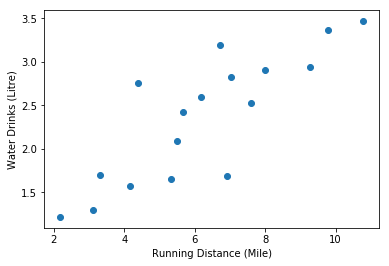

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

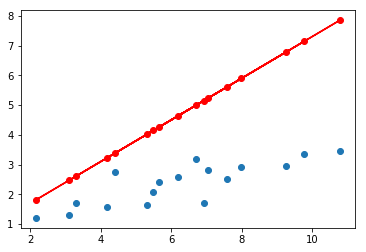

In [13]:
predicted_y_values = list(map(lambda x: 0.7*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, 'ro-')

## Activity: Calculate the error between the actual dotted points and the line (which is our estimation)

In [14]:
error = [(i-j) for i, j in zip(Y, predicted_y_values)]

np.var(error, ddof=1)

1.3343514911764705

In [16]:
# MSE
sum([i**2 for i in error])/len(error)

6.518593101764703

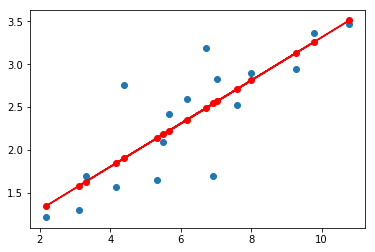

In [17]:
predicted_y_values = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, 'ro-')

In [18]:
error = [(i-j) for i, j in zip(Y, predicted_y_values)]

np.var(error, ddof=1)


0.16347377866953056

In [19]:
# MSE
sum([i**2 for i in error])/len(error)

0.15385767404191164

## Percentile

Percentile is defined as the value below which a percentage of the data falls. Percentiles can help us interpret the standing of a particular value within a data set. Given a dataset we can calculate the nth percentile using the steps below: 
1. Arrange the data in ascending order
2. Find the index of the (ordinal rank) of the percentile value by calculating index = ceiling((percent/100) * len(data))
3. Find the value that is located at the index

### Activity: Write a function to compute the percentile



In [20]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

def percentile(data, percent):
    #first we want to sort the data in ascending order
    data = np.sort(data)
    #then we will get the index
    
    index = (percent/100)*len(data) #TODO: finish this
    
    #we will have to round up to the nearest whole number using the ceiling method and covert to an int
    index = int(np.ceil(index))
    
    return data[index-1] #adjust by -1 since indices start with 0
    
print(percentile(data, 44))
#check your work by comparing to numpy.percentile()
print(int(np.percentile(data, 44)))

3
3


### Verify 44 percent of the data is less or equal than 3 for that given list?

In [22]:
# Count how many 0 do we have? ->2
# Count how many 1 do we have? ->2
# Count how many 2 do we have? ->1
# Count how many 3 do we have? ->5

(2 + 2 + 1 + 5)/len(data) 

0.43478260869565216

## Covariance and Correlation

### Covariance

Covariance can be used to measure how two variables change or vary together. A positive covariance means the variables are positively related, while a negative covariance means the variables are inversely related.

Covariance can be calculated like this:

Covariance: $Cov(X,Y)=1/(n-1) \sum_{i=1}^{n}(x[i] - \bar{x})(y[i] - \bar{y})$

If we know the distribution of X and Y:

Covariance: $Cov(X,Y)=E((X−μ_X)(Y −μ_Y))$

X and Y are random variables:

$E(X) = μ_X$ is the expected value (the mean) of the random variable X 

$E(Y) = μ_Y$ is the expected value (the mean) of the random variable Y

Lets watch this Video: https://www.youtube.com/watch?v=0GzMcUy7ZI0

### Correlation

Correlation is used to test relationships between quantitative variables

Some examples of data that have a high correlation:

1- Your caloric intake and your weight

2- The amount of time your study and your GPA

Question what is negative correlation?
Answer: Running in miles and weight

Question what is zero correlation?
Answer: IQ and Age

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior.

- Mathematically:

$corr(X,Y)= \sum_{i=1}^{n}(x[i] - \bar{x})(y[i] - \bar{y})/\big((\sum_{i=1}^{n}(x[i] - \bar{x})^2)(\sum_{i=1}^{n}(y[i] - \bar{y})^2)\big)^{1/2}$

If we know the distribution of X and Y:

$\rho_{XY}=Cov(X,Y)/μ_Xμ_Y$

Correlation is broadly defined as the statistical relationship between two quantitative variables. It is similar to covaraince in that it can be used measure how variables change together. However, correlation not only can tell us the direction of the relationship, but also the strength.

There are a number of reasons why different variables could be correlated. It is important to keep in mind that correlation does not necessarily mean causation. Two variables being correlated does not always mean that one is caused by the other, it may be the case that these varaibles could both depend on a third unknown variable. All correlation tells us is that there is some sort of relationship present which can help us make predictions about future behavior. 

We can describe some correlations in terms of how variables change. 

If a positve correlation is present, both variables will change in the same direction. If the value of one variable increases then the value of the other variable will also increase. They will also decrese together as well. 

If a neutral correlation is present there is no measureable relationship when the variables change.

If a negative correlation is present, then when one variables goes up the other will go down and vice versa.

![Correlation Direction](correlation_direction.jpg)


Correlation refers to the idea of relationships between variables but there are several different ways to actually calculate correlation using a correlation coefficient, which is a way to represent the relationship with a value. In this course we will focus on Pearson's correlation coefficient as known as Pearson's r.

![Pearson's r](Pearson.jpg)



## Activity: Obtain the correlation between two columns in Titanic, Fare and Siblings/Spouses Aboard

- We want to know if we have large famility size then can we conclude we paid more 

In [33]:
import pandas as pd
import scipy.stats

df = pd.read_csv('titanic.csv')

#here is a function to calculate pearson's correlation coefficient
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['Fare'], df['Siblings/Spouses Aboard']))
print(scipy.stats.pearsonr(df['Fare'], df['Siblings/Spouses Aboard']))



0.15883935829132229
(0.1588393582913223, 1.9925060302939916e-06)
